## 策略逻辑：
- 空仓：10天均线在40天均线的上下3点范围内。
- 多头：10天均线 高于40天均线势3点。
- 空头：10天均线低于40天均线3点。

（此次略非多即空）

In [24]:
import tushare as ts
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [25]:
#获取数据
hs300=ts.get_hist_data('hs300')
hs300=hs300.sort_index()

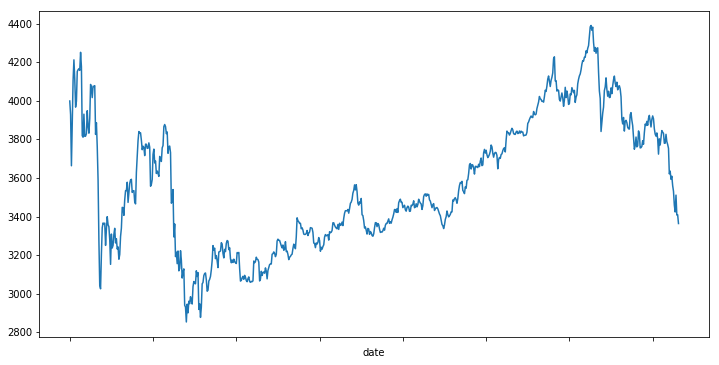

In [26]:
# 显示沪深300三年走势
hs300['close'].plot(figsize=(12,6))
plt.setp(plt.gca().get_xticklabels(),rotation=20)
plt.show()

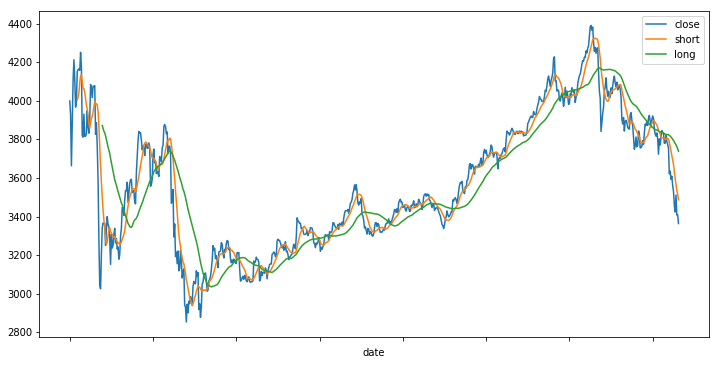

In [40]:
#设置参数
spread=3 #3点

#使用numpy画均线
hs300['short']=np.round(hs300['close'].rolling(window=10,center=False).mean(),2)
hs300['long']=np.round(hs300['close'].rolling(window=40,center=False).mean(),2)
hs300['short-long']=hs300['short']-hs300['long']

#显示走势以及均线
hs300[['close','short','long']].plot(figsize=(12,6))
plt.setp(plt.gca().get_xticklabels(),rotation=20)
plt.show()


In [41]:
# 产生交易信号, 通过数据统计库numpy的where函数对逻辑进行判定。
# 在hs300实例中增加【signal】列，从而产生交易信号。
hs300['signal']=np.where(hs300['short-long']>spread, 1, 0)
hs300['signal']=np.where(hs300['short-long']<spread, -1, hs300['signal'])
print hs300['signal'].value_counts()

 1    401
-1    292
 0     39
Name: signal, dtype: int64


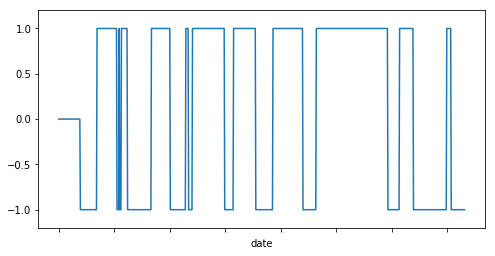

In [42]:
#显示交易信号
hs300['signal'].plot(figsize=(8,4))
plt.ylim([-1.2,1.2])
plt.setp(plt.gca().get_xticklabels(),rotation=20)
plt.show()

In [45]:
hs300['close'].head(5)

date
2015-07-06    3998.54
2015-07-07    3928.00
2015-07-08    3663.04
2015-07-09    3897.63
2015-07-10    4106.56
Name: close, dtype: float64

In [47]:
hs300['close'].shift(1).head(5)

date
2015-07-06        NaN
2015-07-07    3998.54
2015-07-08    3928.00
2015-07-09    3663.04
2015-07-10    3897.63
Name: close, dtype: float64

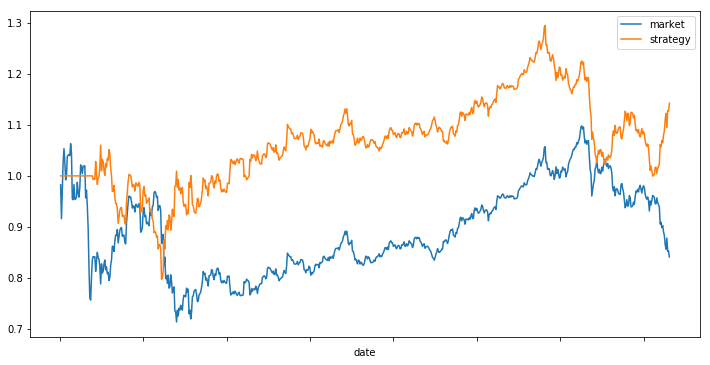

In [48]:
#显示资金曲线

hs300['market']=np.log(hs300['close']/hs300['close'].shift(1))
hs300['strategy']=hs300['signal'].shift(1)*hs300['market']
hs300[['market','strategy']].cumsum().apply(np.exp).plot(figsize=(12,6)) # 累计值
plt.setp(plt.gca().get_xticklabels(),rotation=20)
plt.show()